In [ ]:
***** NUMBER 1 

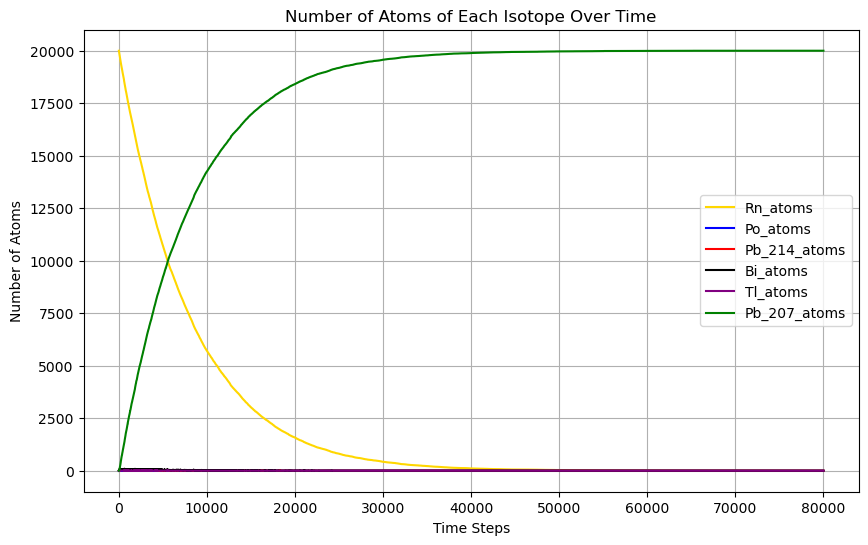

In [129]:
import numpy as np
import matplotlib.pyplot as plt

#=========================================================
starting_atoms = 20000  # Initial number 
time_steps = 80000    
#=========================================================
atoms = {
    'Rn_atoms': starting_atoms,   
    'Po_atoms': 0,                 
    'Pb_214_atoms': 0,             
    'Bi_atoms': 0,             
    'Tl_atoms': 0,                
    'Pb_207_atoms': 0  
}

#=========================================================
#RATES OF TIMEEEEE in minutes 
decay_process = {
    'Rn_atoms': np.log(2) / (3.8 * 24 * 60),  #converted to minutes
    'Po_atoms': np.log(2) / 3.1,              
    'Pb_214_atoms': np.log(2) / 26.8,          
    'Bi_atoms': np.log(2) / 19.9,            
    'Tl_atoms': np.log(2) / 1.3              
}
#=========================================================
def decay_step(atoms, decay_process):
    new_atoms = atoms.copy()

#=========================================================
    
# Perform decay 
    
    for isotope in atoms:
        if isotope in decay_process:  
            decay_rate = decay_process[isotope]

#=========================================================            
# Calculate the number of decays 
            decay_count = np.random.poisson(decay_rate * atoms[isotope])
            decay_count = min(decay_count, atoms[isotope])

            
#=========================================================
#motion of process
            
            if isotope == 'Rn_atoms':
                new_atoms['Po_atoms'] += decay_count
            elif isotope == 'Po_atoms':
                new_atoms['Pb_214_atoms'] += decay_count
            elif isotope == 'Pb_214_atoms':
                new_atoms['Bi_atoms'] += decay_count
            elif isotope == 'Bi_atoms':
                new_atoms['Tl_atoms'] += decay_count
            elif isotope == 'Tl_atoms':
                new_atoms['Pb_207_atoms'] += decay_count
#==============================================================
            
            new_atoms[isotope] -= decay_count

    return new_atoms

# Run  it !
for step in range(time_steps):
    atoms = decay_step(atoms, decay_process)
    

#=========================================================
# PLOT

plt.figure(figsize=(10, 6))

colors = {
    'Rn_atoms': 'gold',         
    'Po_atoms': 'blue',        
    'Pb_214_atoms': 'red',      
    'Bi_atoms': 'black',       
    'Tl_atoms': 'purple',     
    'Pb_207_atoms': 'green'    
}

#=========================================================
for isotope, history in atoms_history.items():
    plt.plot(history, label=isotope, color=colors[isotope])

#=========================================================
plt.title('Number of Atoms of Each Isotope Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Number of Atoms')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
***** NUMBER 2

in MeV:
α: 118976.20 MeV
β: 27.87 MeV
R: 30011.69 MeV
Z: 239.09 MeV


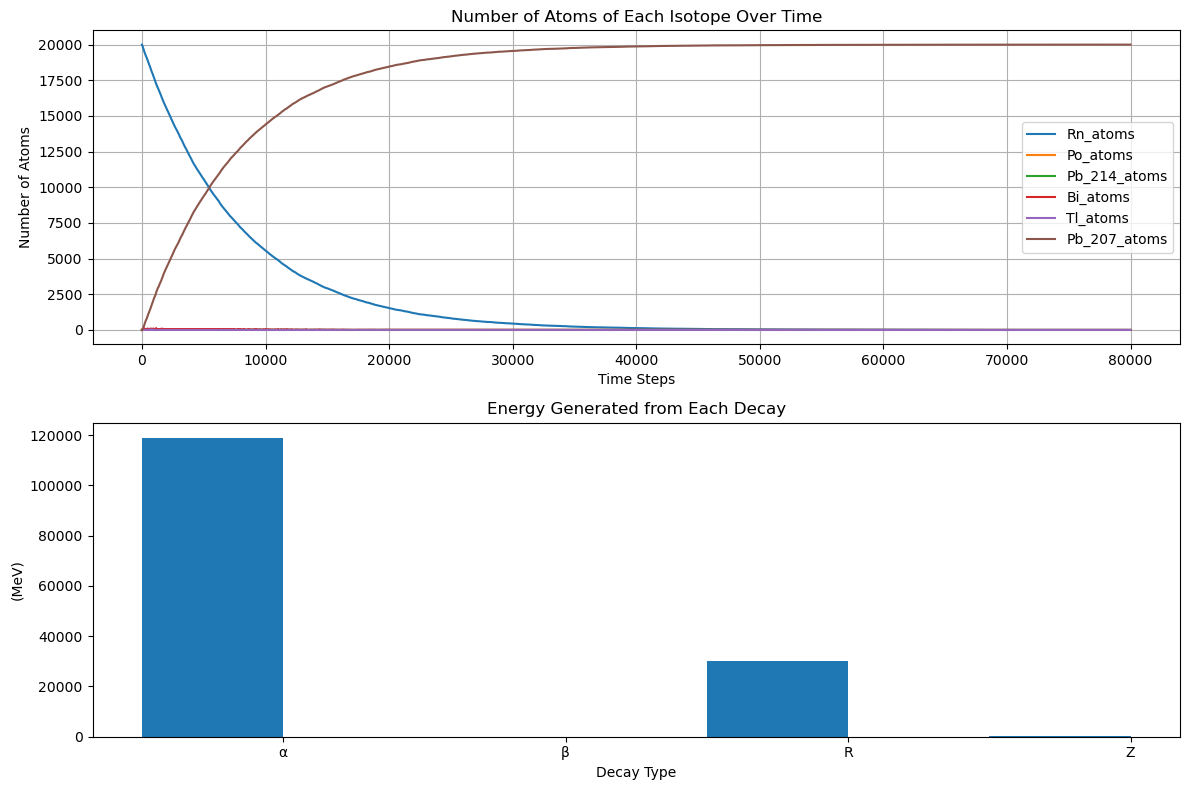

In [131]:
import numpy as np
import matplotlib.pyplot as plt

#=========================================================
starting_atoms = 20000  # Initial number 
time_steps = 80000    
#=========================================================

atoms = {
    'Rn_atoms': starting_atoms,   
    'Po_atoms': 0,                 
    'Pb_214_atoms': 0,             
    'Bi_atoms': 0,             
    'Tl_atoms': 0,                
    'Pb_207_atoms': 0  
}

#=========================================================

#minutes (half-lives)
decay_process = {
    'Rn_atoms': np.log(2) / (3.8 * 24 * 60),  
    'Po_atoms': np.log(2) / 3.1,             
    'Pb_214_atoms': np.log(2) / 26.8,         
    'Bi_atoms': np.log(2) / 19.9,             
    'Tl_atoms': np.log(2) / 1.3
}

#=========================================================
decay_energies = {
    'α': 4.0,  
    'β': 6.0,  
    'R': 1.0, 
    'Z': 8.0  
}
#=========================================================

energy_percentages = {
    'α': 0.9998,  
    'β': 0.0002,  
    'R': 0.997,
    'Z': 0.003  
}
#=========================================================

def decay_step(atoms, decay_process, decay_energies, energy_percentages):
    new_atoms = atoms.copy()

    energy_generated = {
        'α': 0.0,  
        'β': 0.0,
        'R': 0.0, 
        'Z': 0.0   
    }
#=========================================================

    for isotope in atoms:
        if isotope in decay_process:  
            decay_rate = decay_process[isotope]

            decay_count = np.random.poisson(decay_rate * atoms[isotope])
            decay_count = min(decay_count, atoms[isotope])
#===========================================================================================
            # Decay process------>
            
            if isotope == 'Rn_atoms':
                new_atoms['Po_atoms'] += decay_count
                energy_generated['R'] += decay_count * decay_energies['R'] * energy_percentages['R']

            elif isotope == 'Po_atoms':     #either Pb_214 or Bi
                if np.random.rand() < 0.5:
                    new_atoms['Pb_214_atoms'] += decay_count
                    energy_generated['α'] += decay_count * decay_energies['α'] * energy_percentages['α']
                else:
                    new_atoms['Bi_atoms'] += decay_count
                    energy_generated['β'] += decay_count * decay_energies['β'] * energy_percentages['β']

            elif isotope == 'Pb_214_atoms':
                new_atoms['Bi_atoms'] += decay_count
                energy_generated['Z'] += decay_count * decay_energies['Z'] * energy_percentages['Z']

            elif isotope == 'Bi_atoms':
                #either Tl or Pb-207
                if np.random.rand() < 0.5:
                    new_atoms['Tl_atoms'] += decay_count
                    energy_generated['α'] += decay_count * decay_energies['Z'] * energy_percentages['α']
                else:
                    new_atoms['Pb_207_atoms'] += decay_count
                    energy_generated['R'] += decay_count * decay_energies['R'] * energy_percentages['R']

            elif isotope == 'Tl_atoms':
             
                new_atoms['Pb_207_atoms'] += decay_count
                energy_generated['β'] += decay_count * decay_energies['Z'] * energy_percentages['β']

            new_atoms[isotope] -= decay_count

    return new_atoms, energy_generated
#====================================================================================================
#run the process

def run_simulation():
    atoms = {
        'Rn_atoms': starting_atoms,   
        'Po_atoms': 0,                 
        'Pb_214_atoms': 0,             
        'Bi_atoms': 0,             
        'Tl_atoms': 0,                
        'Pb_207_atoms': 0  
    }
    
    total_energy_generated = {
        'α': 0.0, 'β': 0.0, 'R': 0.0, 'Z': 0.0
    }
    
    atoms_history = {'Rn_atoms': [], 'Po_atoms': [], 'Pb_214_atoms': [], 'Bi_atoms': [], 'Tl_atoms': [], 'Pb_207_atoms': []}
    
    for step in range(time_steps):
        atoms, energy_generated = decay_step(atoms, decay_process, decay_energies, energy_percentages)
        
        for key in atoms:
            atoms_history[key].append(atoms[key])
        
        for decay_type in energy_generated:
            total_energy_generated[decay_type] += energy_generated[decay_type]

    return atoms_history, total_energy_generated

# Running the simulation
atoms_history, energy_generated = run_simulation()
#====================================================================================================

print("in MeV:")
for decay_type in energy_generated:
    print(f"{decay_type}: {energy_generated[decay_type]:.2f} MeV")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title('Number of Atoms of Each Isotope Over Time')
for isotope, history in atoms_history.items():
    plt.plot(history, label=isotope)
plt.xlabel('Time Steps')
plt.ylabel('Number of Atoms')
plt.legend()
plt.grid(True)

#====================================================================================================
plt.subplot(2, 1, 2)
plt.title('Energy Generated from Each Decay')
decay_types = ['α', 'β', 'R', 'Z']
energy_values = [energy_generated[decay] for decay in decay_types]
bar_width = 0.5
index = np.arange(len(decay_types))

plt.bar(index, energy_values, bar_width)

plt.xlabel('Decay Type')
plt.ylabel('(MeV)')
plt.xticks(index + bar_width / 2, decay_types)
plt.tight_layout()
plt.show()

In [ ]:
***** NUMBER 3

In [164]:
import numpy as np
starting_atoms = 20000  # Initial number 
time_steps = 80000    
num_runs = 10
#================================================================

decay_process = {
    'Rn_atoms': np.log(2) / (3.8 * 24 * 60),  
    'Po_atoms': np.log(2) / 3.1,              
    'Pb_214_atoms': np.log(2) / 26.8,         
    'Bi_atoms': np.log(2) / 19.9,           
    'Tl_atoms': np.log(2) / 1.3              
}
#================================================================

decay_energies = {
    'α': 4.0,  
    'β': 6.0,  
    'R': 1.0,  
    'Z': 8.0   
}

#================================================================

def decay_step(atoms, decay_process, decay_energies, energy_percentages):
    new_atoms = atoms.copy()

    energy_generated = {
        'α': 0.0,  
        'β': 0.0,  
        'R': 0.0,  
        'Z': 0.0 
    }

#================================================================

    for isotope in atoms:
        if isotope in decay_process:  
            decay_rate = decay_process[isotope]
            
            decay_count = np.random.poisson(decay_rate * atoms[isotope])
            decay_count = min(decay_count, atoms[isotope])

#========================================================================================
            if isotope == 'Rn_atoms':
                new_atoms['Po_atoms'] += decay_count
                energy_generated['R'] += decay_count * decay_energies['R'] * energy_percentages['R']

            elif isotope == 'Po_atoms':
                if np.random.rand() < 0.5:
                    new_atoms['Pb_214_atoms'] += decay_count
                    energy_generated['α'] += decay_count * decay_energies['α'] * energy_percentages['α']
                else:
                    new_atoms['Bi_atoms'] += decay_count
                    energy_generated['β'] += decay_count * decay_energies['β'] * energy_percentages['β']

            elif isotope == 'Pb_214_atoms':
                new_atoms['Bi_atoms'] += decay_count
                energy_generated['Z'] += decay_count * decay_energies['Z'] * energy_percentages['Z']

            elif isotope == 'Bi_atoms':
                if np.random.rand() < 0.5:
                    new_atoms['Tl_atoms'] += decay_count
                    energy_generated['α'] += decay_count * decay_energies['Z'] * energy_percentages['α']
                else:
                    new_atoms['Pb_207_atoms'] += decay_count
                    energy_generated['R'] += decay_count * decay_energies['R'] * energy_percentages['R']

            elif isotope == 'Tl_atoms':
                new_atoms['Pb_207_atoms'] += decay_count
                energy_generated['β'] += decay_count * decay_energies['Z'] * energy_percentages['β']

            new_atoms[isotope] -= decay_count

    return new_atoms, energy_generated
    
#====================================================================================================
def run_simulation():
    atoms = {
        'Rn_atoms': starting_atoms,   
        'Po_atoms': 0,                 
        'Pb_214_atoms': 0,             
        'Bi_atoms': 0,             
        'Tl_atoms': 0,                
        'Pb_207_atoms': 0  
    }
    
    total_energy_generated = {
        'α': 0.0, 'β': 0.0, 'R': 0.0, 'Z': 0.0
    }
    
    
    for step in range(time_steps):
        atoms, energy_generated = decay_step(atoms, decay_process, decay_energies, energy_percentages)
        
        
        for decay_type in energy_generated:
            total_energy_generated[decay_type] += energy_generated[decay_type]

    return total_energy_generated
#=====================================================================================================

all_energy_generated = {'α': [], 'β': [], 'R': [], 'Z': []}

for _ in range(num_runs):
    energy_generated = run_simulation()
    for decay_type in energy_generated:
        all_energy_generated[decay_type].append(energy_generated[decay_type])

#================================================================
energy_stats = {}
for decay_type in all_energy_generated:
    energies = all_energy_generated[decay_type]
    avg_energy = np.mean(energies)
    std_dev_energy = np.std(energies)
    energy_stats[decay_type] = (avg_energy, std_dev_energy)
#================================================================

print("Average & Standard Deviation =")

#================================================================
for decay_type in energy_stats:
    avg_energy, std_dev_energy = energy_stats[decay_type]
    print(f"{decay_type}: Average = {avg_energy:.2f} MeV, Standard Deviation = {std_dev_energy:.2f} MeV")



Average & Standard Deviation =
α: Average = 120130.37 MeV, Standard Deviation = 737.48 MeV
β: Average = 28.08 MeV, Standard Deviation = 0.33 MeV
R: Average = 29876.20 MeV, Standard Deviation = 115.64 MeV
Z: Average = 239.36 MeV, Standard Deviation = 3.59 MeV


In [ ]:
***** NUMBER 4

In [168]:
# Given data
average_alpha_energy = 120130.37  
std_dev_alpha_energy = 737.48 
energy_per_cm = 3000           # Energy blocked

total_energy_to_block = average_alpha_energy + 3 * std_dev_alpha_energy

shield_thickness_cm = total_energy_to_block / energy_per_cm

print(f"Shield thickness required to block particle ~ {shield_thickness_cm:.2f} cm")


Shield thickness required to block particle ~ 40.78 cm
